In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
print(df)

             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing, Cycling ...    0.0    

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part One

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize = 'index') * 100
crosstab.sort_values(by=True, ascending=False, inplace=True)
print(crosstab)

isBestSeller                           False     True 
category                                              
Grocery                            94.186533  5.813467
Smart Home Security & Lighting     94.230769  5.769231
Health & Personal Care             94.231372  5.768628
Mobile Phone Accessories           95.752896  4.247104
Power & Hand Tools                 96.466105  3.533895
...                                      ...       ...
CD, Disc & Tape Players           100.000000  0.000000
General Music-Making Accessories  100.000000  0.000000
Snowboard Boots                   100.000000  0.000000
Boxes & Organisers                100.000000  0.000000
eBook Readers & Accessories       100.000000  0.000000

[296 rows x 2 columns]


In [5]:
#Categories with the highest amount of best sellers: grocery, Smart Home Security & Lighting, Health & Personal Care, Mobile Phone Accessories, Power & Hand Tools

In [6]:
#the best seller is dependent on the category
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["category"], df["isBestSeller"]))
print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 36540.20270061387, p-value: 0.0


In [7]:
#There is a weak associacion
import numpy as np
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.1222829439760564


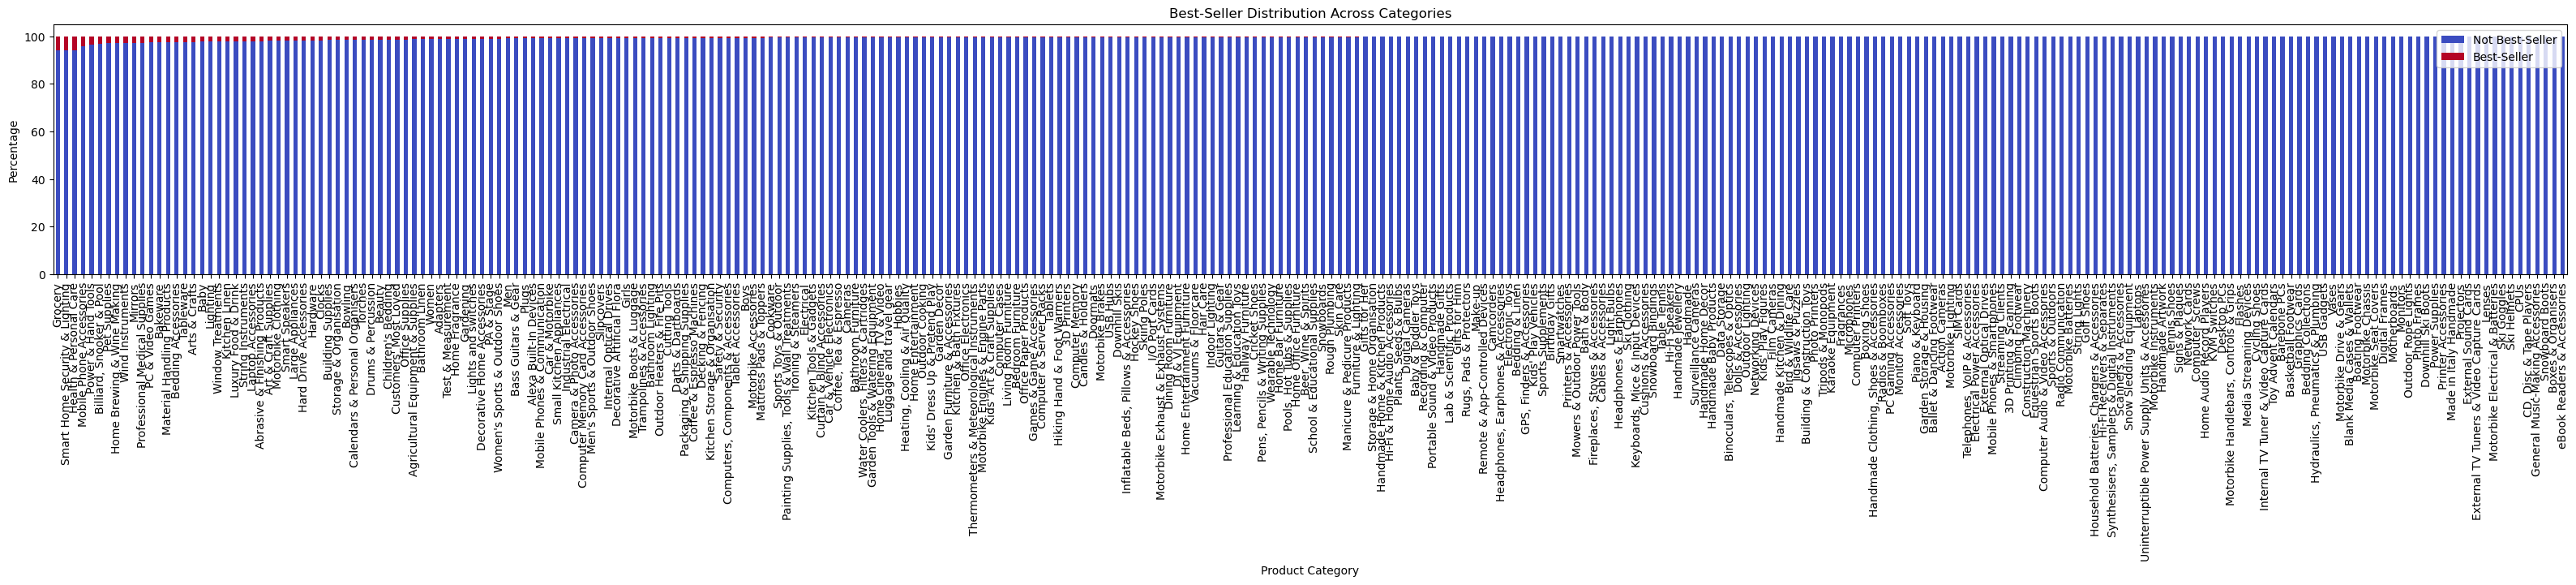

In [8]:
crosstab.plot(kind="bar", stacked=True, figsize=(40, 4), colormap="coolwarm")
plt.xlabel("Product Category")
plt.ylabel("Percentage")
plt.title("Best-Seller Distribution Across Categories")
plt.legend(["Not Best-Seller", "Best-Seller"])
plt.show()

## Part 2

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

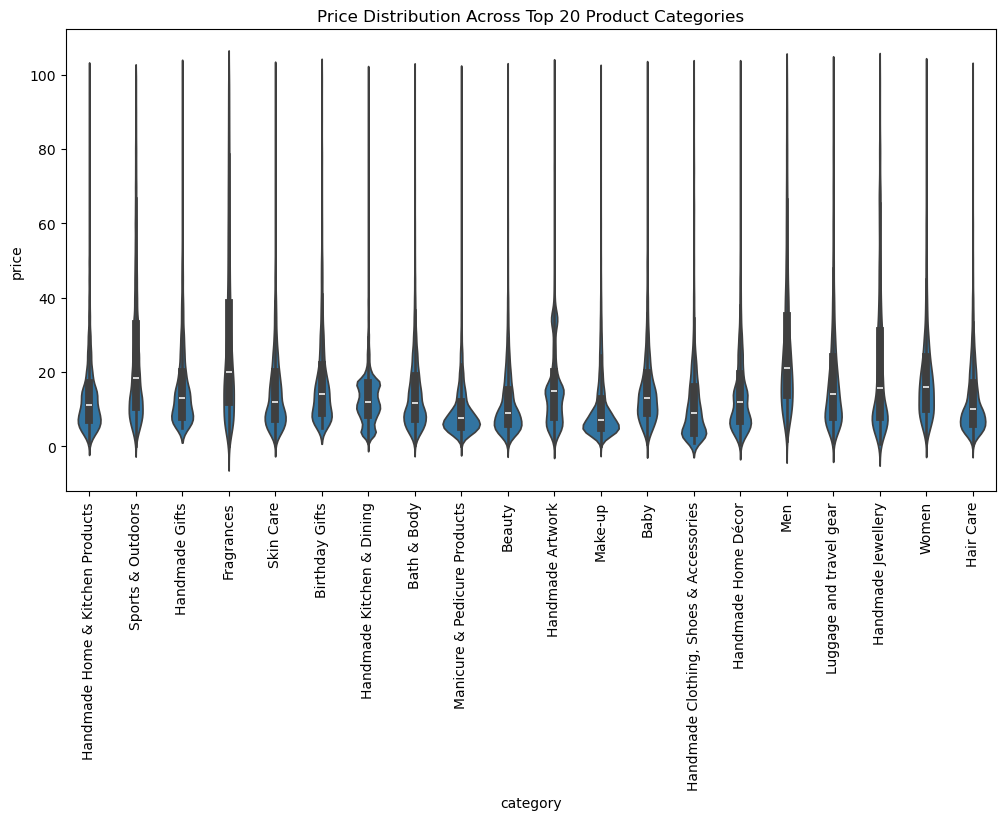

In [10]:
top_20_categories = df_without_outliers["category"].value_counts().nlargest(20).index
df_filtered = df_without_outliers[df_without_outliers["category"].isin(top_20_categories)]
plt.figure(figsize=(12, 6))
sns.violinplot(x="category", y="price", data=df_filtered)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Top 20 Product Categories")
plt.show()


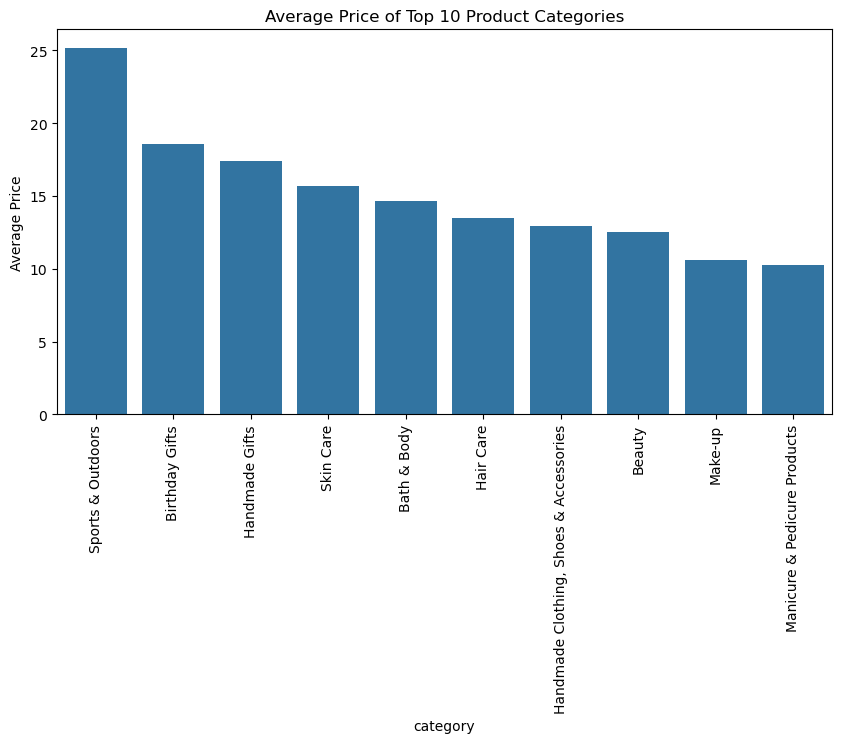

In [11]:
top_10_categories = df_without_outliers["category"].value_counts().nlargest(10).index
avg_price_per_category = df_without_outliers[df_without_outliers["category"].isin(top_10_categories)] \
    .groupby("category")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.title("Average Price of Top 10 Product Categories")
plt.show()


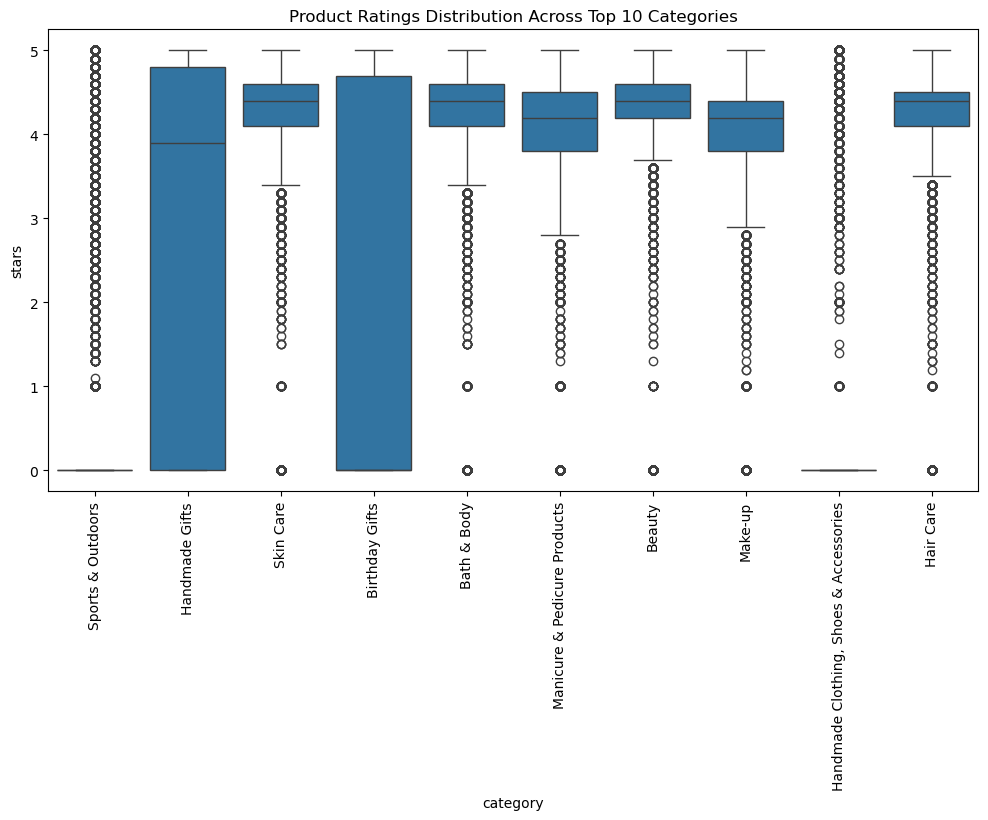

In [12]:
top_10_categories = df_without_outliers["category"].value_counts().nlargest(10).index
df_filtered_ratings = df_without_outliers[df_without_outliers["category"].isin(top_10_categories)]
plt.figure(figsize=(12, 6))
sns.boxplot(x="category", y="stars", data=df_filtered_ratings)
plt.xticks(rotation=90)
plt.title("Product Ratings Distribution Across Top 10 Categories")
plt.show()


In [13]:
correlation = df_without_outliers["price"].corr(df_without_outliers["stars"])
print(f"Correlation between Price and Rating: {correlation}")

Correlation between Price and Rating: -0.07767299878181444


In [14]:
# no significant correlation

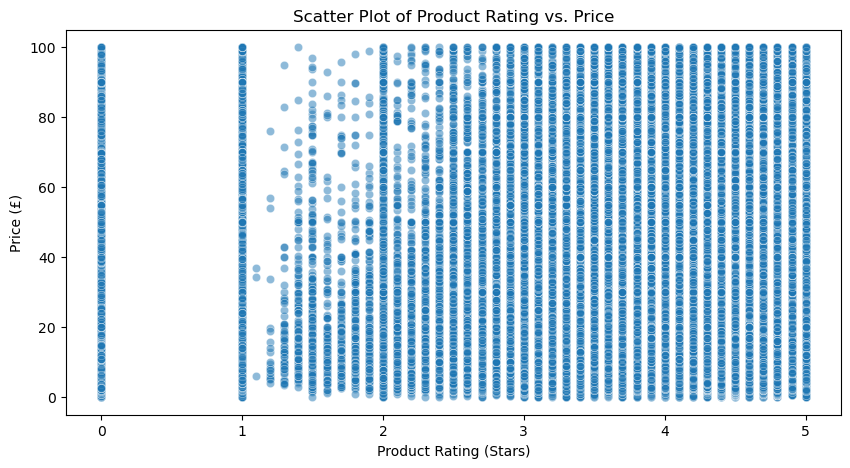

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_without_outliers["stars"], y=df_without_outliers["price"], alpha=0.5)
plt.xlabel("Product Rating (Stars)")
plt.ylabel("Price (£)")
plt.title("Scatter Plot of Product Rating vs. Price")
plt.show()

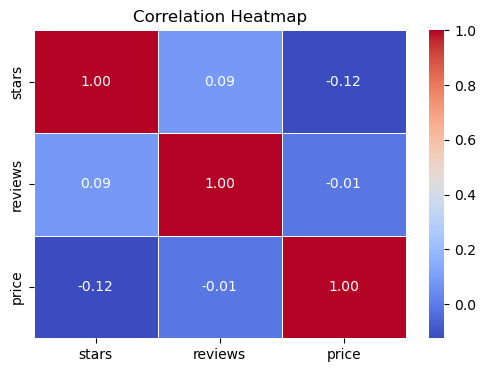

In [19]:
columns = ["stars", "reviews", "price"]
df_selected = df[columns]

corr = df_selected.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

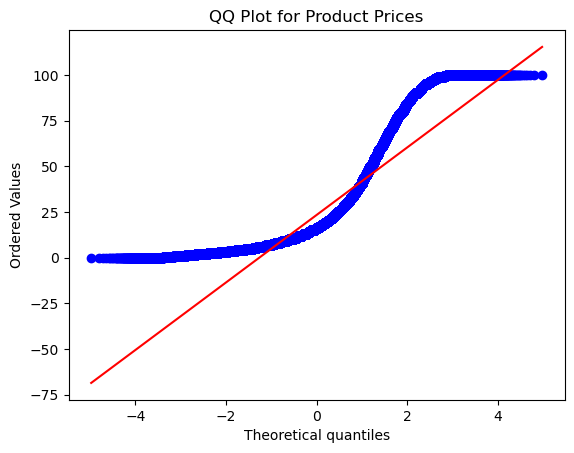

In [16]:
import scipy.stats as stats
import pylab
stats.probplot(df_without_outliers["price"], dist="norm", plot=pylab)
pylab.title("QQ Plot for Product Prices")
pylab.show()

In [17]:
#most products are cheap or expensive but not evenly spread

In [18]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
